Importing the dataset

In [29]:
import pandas as pd
data=pd.read_csv("Video games.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Cleaning the dataset

In [3]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [31]:
data['Year']=data['Year'].fillna(2009)


In [6]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [7]:
data['Publisher'].value_counts()


Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [32]:
data['Publisher']=data['Publisher'].fillna('Electronic Arts')


In [9]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Area chart  :  show the trend of global sales over the years

In [24]:
import plotly.express as px
fig = px.area(data, x='Year', y='Global_Sales')
fig.show()

Histogram  : show the distribution of global sales

<AxesSubplot:title={'center':'distribution of global sales'}, xlabel='global sales', ylabel='Frequency'>

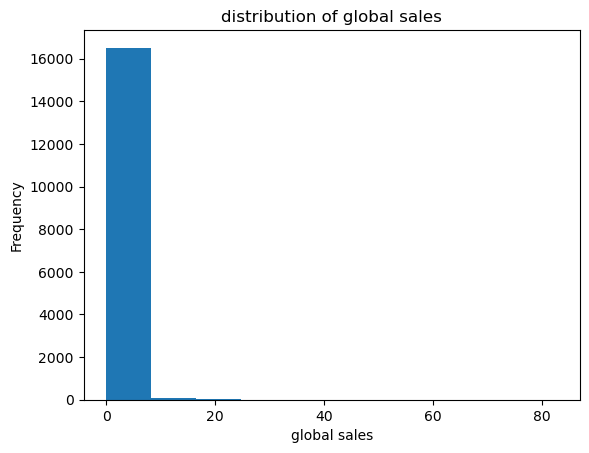

In [28]:
import matplotlib.pyplot as plt

plt.title('distribution of global sales')
plt.xlabel('global sales')
plt.ylabel('frequency')
data['Global_Sales'].plot.hist()

Scatter plot : show the relationship between North American sales and European sales.

In [20]:
fig = px.scatter(data, x='NA_Sales', y='EU_Sales', title='Relationship between NA Sales and EU Sales in Video Games',
                 labels={'NA_Sales': 'NA Sales', 'EU_Sales': 'EU Sales'})
fig.show()

Scatter plot : show the relationship between Japanese sales and Other sales.

In [33]:
import plotly.graph_objs as go
import plotly.offline as pyo
trace = go.Scatter(x=data['JP_Sales'], y=data['Other_Sales'], mode='markers')
liste = [trace]
layout = go.Layout(title='Relationship between Japanese Sales and other sales in Video Games',
                   xaxis=dict(title='JP Sales'),
                   yaxis=dict(title='other Sales'))
fig = go.Figure(data=liste, layout=layout)
pyo.plot(fig)        

'temp-plot.html'

Stacked area chart : show the distribution of sales by platform over the years

In [34]:
import plotly.graph_objs as go
import plotly.offline as pyo


# Group the data by 'Platform' and 'Year' and sum the sales
sales_by_platform_year = data.groupby(['Platform', 'Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Create traces for each region's sales
trace_na = go.Scatter(x=sales_by_platform_year['Year'], y=sales_by_platform_year['NA_Sales'], mode='lines', stackgroup='one', name='NA Sales')
trace_eu = go.Scatter(x=sales_by_platform_year['Year'], y=sales_by_platform_year['EU_Sales'], mode='lines', stackgroup='one', name='EU Sales')
trace_jp = go.Scatter(x=sales_by_platform_year['Year'], y=sales_by_platform_year['JP_Sales'], mode='lines', stackgroup='one', name='JP Sales')
trace_other = go.Scatter(x=sales_by_platform_year['Year'], y=sales_by_platform_year['Other_Sales'], mode='lines', stackgroup='one', name='Other Sales')

# Create a list of traces
traces = [trace_na, trace_eu, trace_jp, trace_other]


layout = go.Layout(title='Distribution of Sales by Platform over the Years',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Sales'))


fig = go.Figure(data=traces, layout=layout)


pyo.plot(fig)


'temp-plot.html'

Bar chart : show the top 10 publishers by global sales.

In [35]:




# Group the data by 'Publisher' and sum the global sales
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort the publishers by global sales in descending order and take the top 10
top_publishers = top_publishers.sort_values(by='Global_Sales', ascending=False).head(10)

# Create a bar chart trace
trace = go.Bar(x=top_publishers['Publisher'], y=top_publishers['Global_Sales'])

# Create a list of traces
traces = [trace]

# Define the layout for the plot
layout = go.Layout(title='Top 10 Publishers by Global Sales',
                   xaxis=dict(title='Publisher'),
                   yaxis=dict(title='Global Sales'))


fig = go.Figure(data=traces, layout=layout)

pyo.plot(fig)


'temp-plot.html'

Pie chart : show the distribution of genres by global sales.

In [38]:
fig = px.pie(data, values=['Global_Sales'], names=['Genre'], color=['Genre'], title='Distribution of genres by global sales')
fig.show()